In [1]:
from collections import defaultdict
import math

def preprocess_text(text):
    # Tokenize the text (split into words)
    words = text.split()
    # Remove punctuation and convert to lowercase
    cleaned_words = [word.lower() for word in words]
    return cleaned_words

def train_naive_bayes(texts, labels):
    # Calculate class priors (P(y))
    class_counts = defaultdict(int)
    total_docs = len(labels)
    for label in labels:
        class_counts[label] += 1
    class_priors = {label: count / total_docs for label, count in class_counts.items()}

    # Calculate word likelihoods (P(x|y))
    word_counts = defaultdict(lambda: defaultdict(int))
    class_totals = defaultdict(int)
    for i, text in enumerate(texts):
        label = labels[i]
        words = preprocess_text(text)
        class_totals[label] += len(words)
        for word in words:
            word_counts[label][word] += 1

    word_likelihoods = {label: {word: count / class_totals[label] for word, count in counts.items()}
                       for label, counts in word_counts.items()}
    return class_priors, word_likelihoods

def classify_naive_bayes(text, class_priors, word_likelihoods):
    words = preprocess_text(text)
    scores = {label: math.log(class_priors[label]) for label in class_priors.keys()}
    for label in class_priors.keys():
        for word in words:
            if word in word_likelihoods[label]:
                scores[label] += math.log(word_likelihoods[label][word])

    # Choose the class with the highest score
    predicted_class = max(scores, key=scores.get)
    return predicted_class

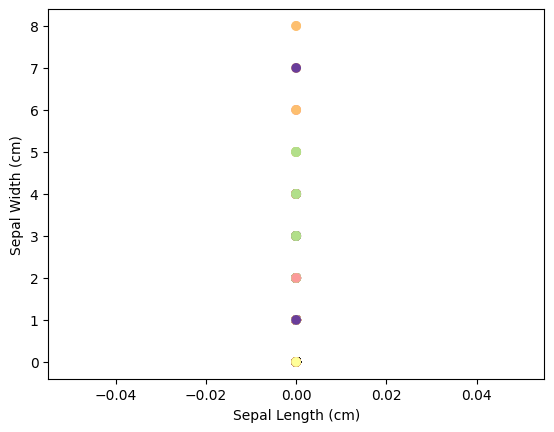

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
data = digits.data
target = digits.target
target_names = digits.target_names

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()